
# **Regresión lineal con mínimos cuadrados**



El modelo a implementar es $\mathbf{\hat{Y}}=\mathbf{XW}$, la función de costo a emplear para la sintonización de $\mathbf{W}$ será mínimos cuadrados: $(\mathbf{Y}-\mathbf{\hat{Y}})^{2}$

In [ ]:
# Importación de librerías
import numpy as np                # librería para el cálculo numérico con matrices y vectores
import scipy as sc                # librería enfocada para análisis científico (toma como referencia numpy) 
import matplotlib.pyplot as plt   # librería para generar gráficas

Se desea realizar la regresión lineal sobre el ejemplo presentado en el cuaderno de notas de la clase (modelar la relación entre el precio medio de una vivienda y su número medio de habitaciones).

In [ ]:
# Importar la base de datos del ejemplo
from sklearn.datasets import load_boston  # sklearn es una librería enfocada al aprendizaje de máquina

In [ ]:
# Cargamos la librería que contiene la base de datos
Boston = load_boston()

# Imprime en pantalla la información de la base de datos
print(Boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Aunque la base de datos Boston tiene 13 variables diferentes por muestra, en el ejemplo expuesto sólo se busca encontrar la relación existente entre el número medio de habitaciones (variable de entrada $\mathbf{X}$ - RM) y el precio medio de la vivienda (variable de salida $\mathbf{Y} - MEDV$),

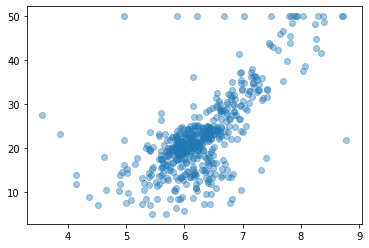

In [ ]:
# Cargar la variable X
X = np.array(Boston.data[:,5])      # Convertimos X a formato array
# Cargar la variable Y
Y = np.array(Boston.target)         # Convertimos Y a formato array

# Graficamos nuestra nube de puntos
plt.scatter(X,Y,alpha=0.4)          # alpha modifica la transparencia de los puntos
plt.show                            # Imprime en pantalla la grafica scatter de la línea anterior

# Recordemos que se debe añadir una columna de 1s para completar la forma matricial de X
X = np.array([np.ones(len(X)),X]).T

Recordemos que es posible modelar nuestros datos mediante regresión lineal haciendo uso de mínimos cuadrados. Recordemos que la solución analítica con esta técnica estaba dada por: $\mathbf{W}=(\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{X}^{T}\mathbf{Y}$ 

<function matplotlib.pyplot.show>

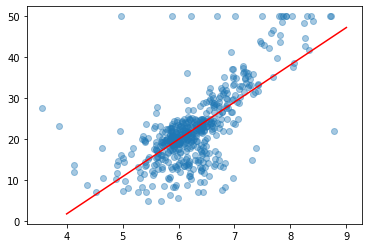

In [ ]:
# Cálculo de W
W = np.linalg.inv(X.T @ X) @ X.T @ Y                         # El operador @ se usa como operador para la multiplicación matricial

# Graficamos el resultado
plt.scatter(X[:,1],Y,alpha=0.4)                             # Nube de puntos        
plt.plot([4,9] , [W[0]+(W[1]*4) , W[0]+(W[1]*9)],c="red")   # Regresión lineal
plt.show                            

Desde el punto de vista computacional para encontrar el valor de $\mathbf{W}$ es necesario calcular una inversa, para datos de gran dimensión será muy costoso encontrar esta variable.